In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O

from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

dpath = "./data/"
train_file = dpath + "train.csv"
test_file = dpath + "test"
sample_file = dpath + "sampleSubmission"
data  = pd.read_csv(train_file,  nrows = 10)

# Get the column names  得到列名，便于以后操作特征
columns = data.columns
print(columns)

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')


In [6]:
test = pd.read_csv('data/test_rate_no_na.csv',nrows=10)
print(test)

   Unnamed: 0    0    1    2         3         4         5         6  \
0           0  0.0  4.0  0.0  0.169331  0.164272  0.126192  0.124851   
1           1  0.0  4.0  0.0  0.169331  0.164272  0.205633  0.205633   
2           2  0.0  4.0  0.0  0.169331  0.164272  0.205633  0.205633   
3           3  0.0  4.0  0.0  0.169331  0.164272  0.118826  0.122750   
4           4  0.0  4.0  0.0  0.169331  0.164272  0.118826  0.122750   
5           5  0.0  4.0  0.0  0.169331  0.183614  0.246505  0.245778   
6           6  0.0  4.0  0.0  0.169331  0.164272  0.205633  0.205633   
7           7  0.0  4.0  0.0  0.169331  0.164272  0.118826  0.122750   
8           8  0.0  4.0  0.0  0.169331  0.164272  0.067349  0.067349   
9           9  0.0  4.0  0.0  0.169331  0.164272  0.205633  0.205633   

          7         8    ...           14        15        16        17  \
0  0.179579  0.198610    ...     0.169176  0.181125  0.147903  0.158608   
1  0.208019  0.198610    ...     0.169176  0.181125  0.20

In [20]:
# Explore every column's data distribution 探索每一列特征的分布情况
for column in columns:
    data_single_col = pd.read_csv(train_file, usecols = [column])
    unique_vals = np.unique(data_single_col)
    
    print("unique values of column {} is {}; total count is:{}".format(column, unique_vals[0,1,-1], unique_vals.shape))

unique values of column id is [5.21159374e+11 1.29622861e+12 1.39895883e+12 ... 1.84467432e+19
 1.84467439e+19 1.84467440e+19]; total count is:(40428967,)
unique values of column click is [0 1]; total count is:(2,)
unique values of column hour is [14102100 14102101 14102102 14102103 14102104 14102105 14102106 14102107
 14102108 14102109 14102110 14102111 14102112 14102113 14102114 14102115
 14102116 14102117 14102118 14102119 14102120 14102121 14102122 14102123
 14102200 14102201 14102202 14102203 14102204 14102205 14102206 14102207
 14102208 14102209 14102210 14102211 14102212 14102213 14102214 14102215
 14102216 14102217 14102218 14102219 14102220 14102221 14102222 14102223
 14102300 14102301 14102302 14102303 14102304 14102305 14102306 14102307
 14102308 14102309 14102310 14102311 14102312 14102313 14102314 14102315
 14102316 14102317 14102318 14102319 14102320 14102321 14102322 14102323
 14102400 14102401 14102402 14102403 14102404 14102405 14102406 14102407
 14102408 14102409 1410

unique values of column app_category is ['07d7df22' '09481d60' '0bfbc358' '0d82db25' '0f2161f8' '0f9a328c'
 '18b1e0be' '2281a340' '2fc4f2aa' '4681bb9d' '4b7ade46' '4ce2e9fc'
 '52de74cf' '5326cf99' '6fea3693' '7113d72a' '71af18ce' '75d80bbe'
 '79f0b860' '86c1a5a3' '879c24eb' '8ded1f7a' '8df2e842' 'a3c42688'
 'a7fd01ec' 'a86a3e89' 'bd41f328' 'bf8ac856' 'cba0e20d' 'cef3e649'
 'd1327cf5' 'dc97ec06' 'ef03ae90' 'f395a87f' 'f95efa07' 'fc6fa53d']; total count is:(36,)
unique values of column device_id is ['00000414' '00000715' '00000919' ... 'ffffde2c' 'ffffe321' 'ffffe5da']; total count is:(2686408,)
unique values of column device_ip is ['0000016d' '00000262' '00000911' ... 'fffff971' 'fffff9d2' 'fffffaa3']; total count is:(6729486,)
unique values of column device_model is ['00097428' '0009f4d7' '000ab70c' ... 'ffe72be2' 'ffeafe15' 'fffc15b0']; total count is:(8251,)
unique values of column device_type is [0 1 2 4 5]; total count is:(5,)
unique values of column device_conn_type is [0 2 3 5]; 

In [65]:
#读取全部数据
data = pd.read_csv(train_file)

In [66]:
# 随机下采样 取0.05的train数据
np.random.seed(999)
r1 = np.random.uniform(0, 1, data.shape[0])  #产生0～40M的随机数
data = data.iloc[r1 < 0.20, :]
data.to_csv('train_0.20.csv',index=False)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8085811 entries, 2 to 40428960
Data columns (total 24 columns):
id                  float64
click               int64
hour                int64
C1                  int64
banner_pos          int64
site_id             object
site_domain         object
site_category       object
app_id              object
app_domain          object
app_category        object
device_id           object
device_ip           object
device_model        object
device_type         int64
device_conn_type    int64
C14                 int64
C15                 int64
C16                 int64
C17                 int64
C18                 int64
C19                 int64
C20                 int64
C21                 int64
dtypes: float64(1), int64(14), object(9)
memory usage: 1.5+ GB


In [10]:
data.describe()

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,1.009850e+05,100985.000000,1.009850e+05,100985.000000,100985.000000,100985.000000,100985.00000,100985.000000,100985.000000,100985.000000,100985.000000,100985.000000,100985.000000,100985.000000,100985.000000
mean,9.257598e+18,0.170035,1.410256e+07,1004.964490,0.289964,1.013824,0.33398,18852.297282,318.995138,60.028975,2113.333931,1.435094,226.978145,53233.589890,83.408387
std,5.313642e+18,0.375666,2.964094e+02,1.076487,0.507307,0.519225,0.85860,4936.856485,22.246421,47.274026,607.128718,1.325145,351.274967,49956.040515,70.312629
min,3.155413e+13,0.000000,1.410210e+07,1001.000000,0.000000,0.000000,0.00000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,1.000000
25%,4.667736e+18,0.000000,1.410230e+07,1005.000000,0.000000,1.000000,0.00000,16920.000000,320.000000,50.000000,1863.000000,0.000000,35.000000,-1.000000,23.000000
50%,9.273293e+18,0.000000,1.410260e+07,1005.000000,0.000000,1.000000,0.00000,20346.000000,320.000000,50.000000,2323.000000,2.000000,39.000000,100048.000000,61.000000
75%,1.386164e+19,0.000000,1.410281e+07,1005.000000,1.000000,1.000000,0.00000,21894.000000,320.000000,50.000000,2526.000000,3.000000,171.000000,100094.000000,101.000000
max,1.844634e+19,1.000000,1.410302e+07,1012.000000,7.000000,5.000000,5.00000,24043.000000,1024.000000,1024.000000,2757.000000,3.000000,1839.000000,100248.000000,255.000000


In [25]:
print(np.add(data.app_id.values, data.site_id.values))

['0acbeaa385f751fd' '51cedd4e85f751fd' 'ecad23861fbe01fe' ...
 '7e7baafa85f751fd' '9c13b41985f751fd' '54c5d54585f751fd']


In [31]:
#对字符型类别先进行Label encoder，用来分析分布情况
columns_str = ['site_id','site_domain','site_category','app_id','app_domain','app_category','device_id','device_ip','device_model']
 

KeyboardInterrupt: 

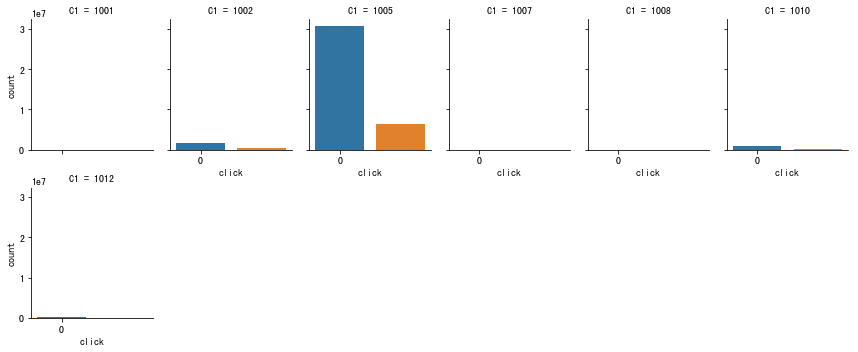

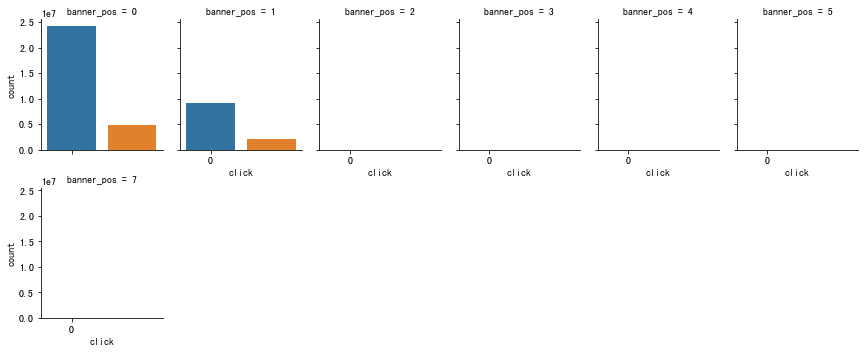

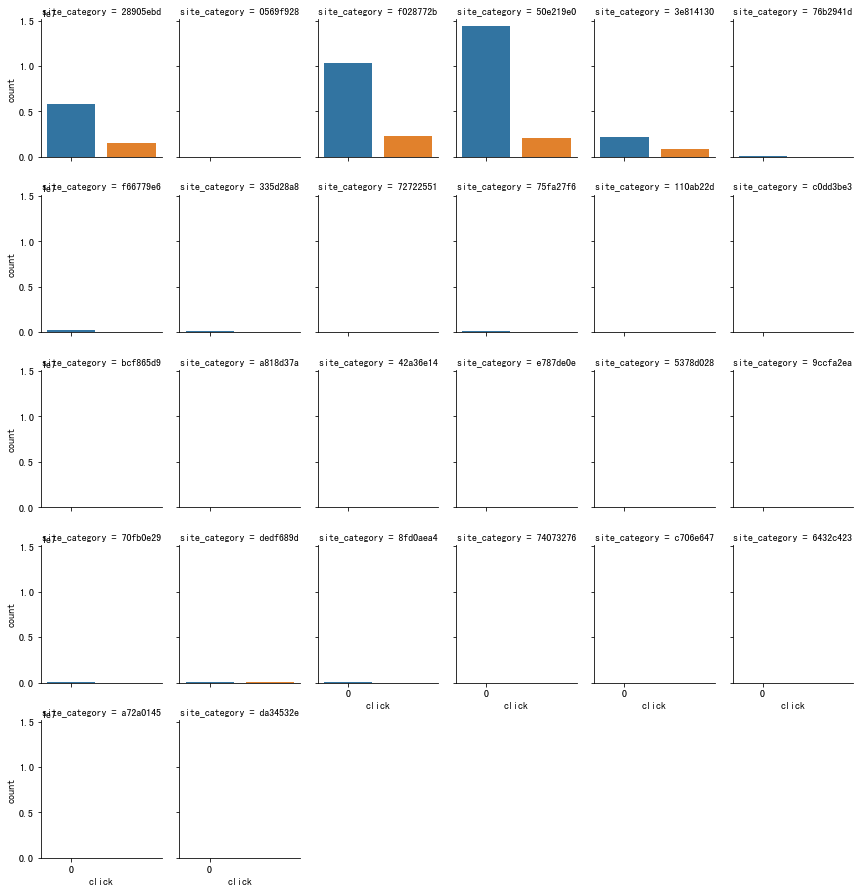

In [59]:
#对字符型特征，探索其与点击率的分布情况
#选择取值数量比较少的几个特征
columns_small = [
    'C1','banner_pos','site_category','app_category',
                 'device_type','device_conn_type',
                'C15','C16','C18']
for column in columns_small:
    g = sns.factorplot("click", col=column, col_wrap=6,
#                     data=pd.read_csv(train_file,usecols=['click',column]),
                       data = data,
                    kind="count", size=2.5, aspect=.8)
    g.set_xticklabels(step=2)
    g.savefig("./EDA/Cross_click_"+column+".png")


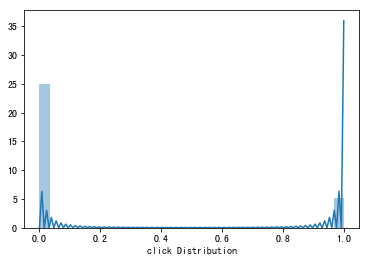

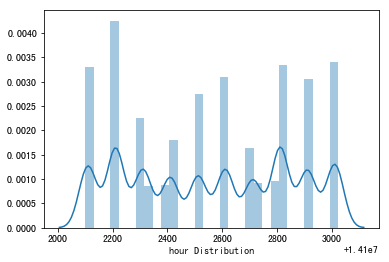

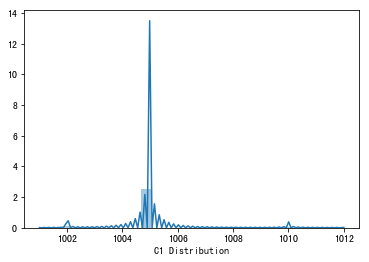

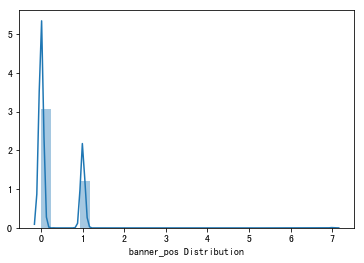

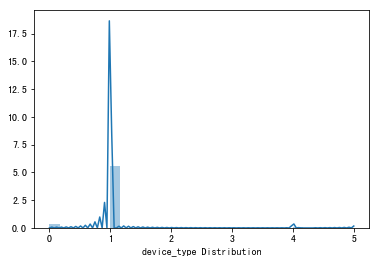

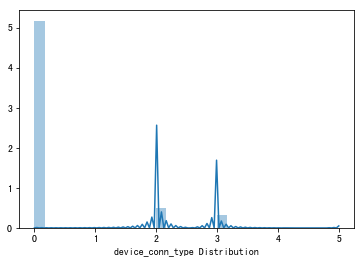

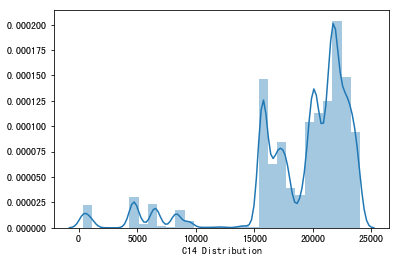

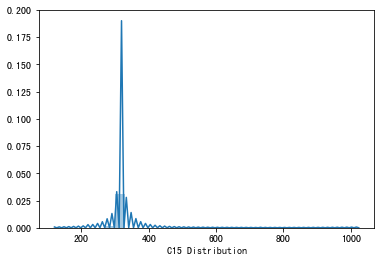

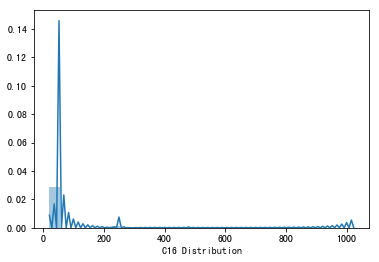

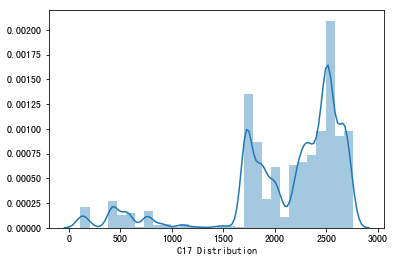

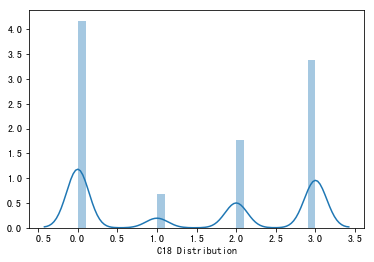

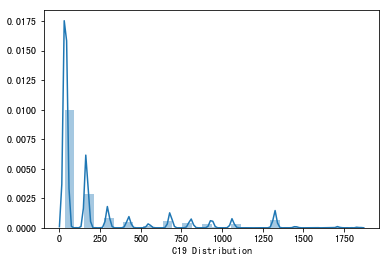

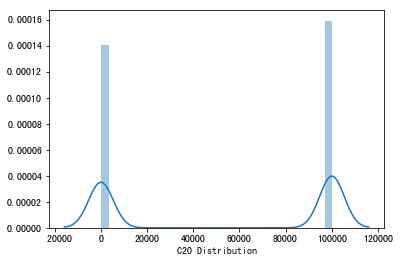

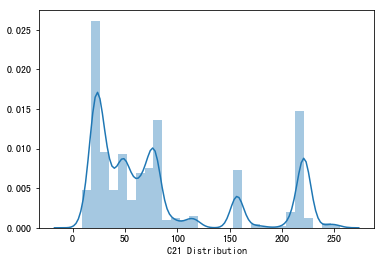

In [30]:
# 显示出每个特征在每个分类下的的分布情况
columns_num = ['click', 'hour', 'C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20','C21']

for column in columns_num:
    fig = plt.figure()
    sns.distplot(data[column].values, bins=30)
    plt.xlabel("{} Distribution".format(column, fontsize=12))
    plt.savefig('./EDA/'+column+' distribution.png')
    plt.show()
   

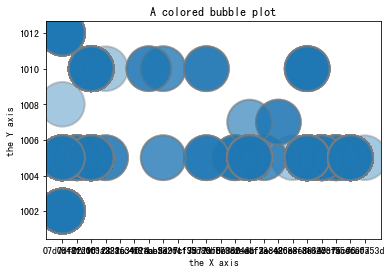

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
 
# create data
x = data.app_category.values
y = data.C1.values
z = data.click.values
 
# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(x, y, s=z*2000, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)
 
# Add titles (main and on axis)
plt.xlabel("the X axis")
plt.ylabel("the Y axis")
plt.title("A colored bubble plot")
 
plt.show()


Text(0.5,1,'Distribution of Hour')

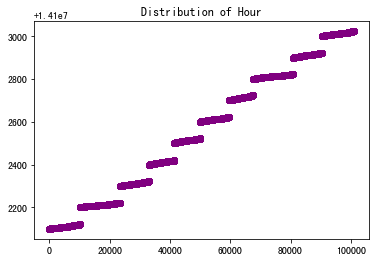

In [15]:
plt.scatter(range(data.shape[0]), data.hour.values,color='purple')
plt.title("Distribution of Hour")

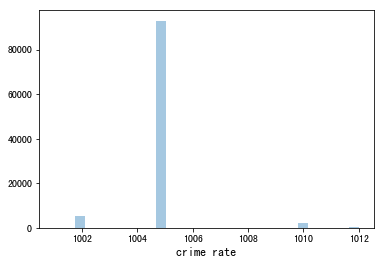

In [17]:
fig = plt.figure()
sns.distplot(data.C1.values, bins=30, kde=False)
plt.xlabel('crime rate', fontsize=12)
plt.show()

# 两两特征之间的相关性

In [68]:
# get the names of all the columns
cols = data.columns

# Calculates pearson co-efficient for all combinations
data_corr = data.corr().abs()

In [78]:
print(np.sort(data_corr.click.values))

[2.35875046e-04 4.31310808e-03 7.73826922e-03 2.22492469e-02
 2.60641251e-02 3.26159625e-02 3.64783748e-02 3.76863189e-02
 5.58973859e-02 5.77885159e-02 6.04294172e-02 7.06728966e-02
 8.33885096e-02 1.30002277e-01 1.00000000e+00]


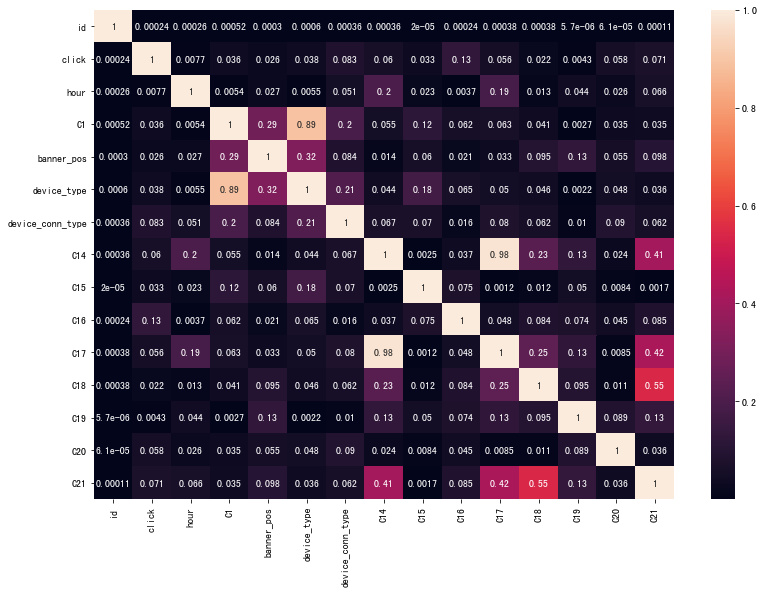

In [69]:
plt.subplots(figsize=(13,9))
sns.heatmap(data_corr, annot=True)

sns.heatmap(data_corr, cbar=False)
plt.savefig(dpath+'CTR_coor.png')
plt.show()

In [16]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

In [16]:
from sklearn.preprocessing import StandardScaler

ss_X = StandardScaler()
ss_y = StandardScaler()

X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

y_train = ss_y.fit_transform(y_train.reshape(-1,1))
y_test = ss_y.transform(y_test.reshape(-1,1))

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

y_test_pred_lr = lr.predict(X_test)
y_train_pred_lr = lr.predict(X_train)

fs = pd.DataFrame({"columns":list(columns), "coef":list((lr.coef_.T))})
fs.sort_values(by=['coef'], ascending=False)

,coef,columns
5,[0.319449057556],RM
8,[0.229843609595],RAD
1,[0.11164947562],ZN
11,[0.0512456938248],B
3,[0.0265359794548],CHAS
2,[-0.0379094943747],INDUS
6,[-0.0552504538354],AGE
0,[-0.0829425704712],CRIM
4,[-0.159177260109],NOX
10,[-0.215616780333],PTRATIO


In [18]:
print ('The r2 score of LinearRegression on test is', r2_score(y_test, y_test_pred_lr))
print ('The r2 score of LinearRegression on train is', r2_score(y_train, y_train_pred_lr))

The r2 score of LinearRegression on test is 0.730555975545
The r2 score of LinearRegression on train is 0.787378457363


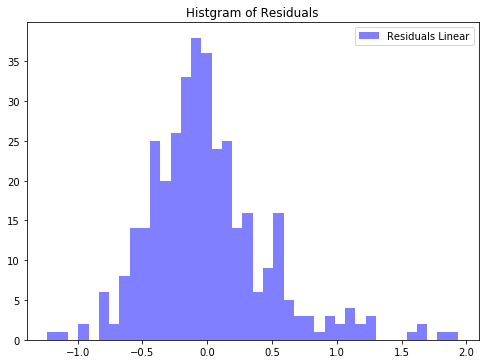

In [19]:
f, ax = plt.subplots(figsize=(7,5))
f.tight_layout()
ax.hist(y_train - y_train_pred_lr, bins=40, label='Residuals Linear', color='b', alpha=.5)
ax.set_title("Histgram of Residuals")
ax.legend(loc='best')

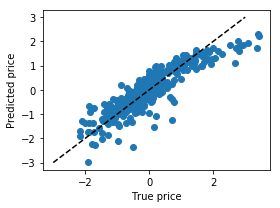

In [20]:
plt.figure(figsize=(4,3))
plt.scatter(y_train, y_train_pred_lr)
plt.plot([-3,3], [-3,3], '--k')
plt.axis('tight')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.tight_layout()

In [21]:
from sklearn.linear_model import SGDRegressor

sgdr = SGDRegressor(max_iter=1000)

sgdr.fit(X_train, y_train)

sgdr.coef_

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([-0.08229312,  0.11129155, -0.03764302,  0.02636709, -0.15868757,
        0.31873648, -0.05506665, -0.31363272,  0.23015066, -0.25481044,
       -0.21506575,  0.05058413, -0.37238701])

In [22]:
print ('The value of default measurement of SGDRegressor on test is', sgdr.score(X_test, y_test))
print ('The value of default measurement of SGDRegressor on train is', sgdr.score(X_train, y_train))

The value of default measurement of SGDRegressor on test is 0.729847721423
The value of default measurement of SGDRegressor on train is 0.78736530141


In [28]:
from sklearn.linear_model import RidgeCV

alphas = [1.0, 10.0]#[0.01, 0.1, 1, 10, 100]

ridge = RidgeCV(alphas=alphas, store_cv_values=True)

ridge.fit(X_train, y_train)

y_test_pred_ridge = ridge.predict(X_test)
y_train_pred_ridge = ridge.predict(X_train)

print ('The r2 score of RidgeCV on test is', r2_score(y_test, y_test_pred_ridge))
print ('The r2 score of RidgeCV on train is', r2_score(y_train, y_train_pred_ridge))

The r2 score of RidgeCV on test is 0.728011409006
The r2 score of RidgeCV on train is 0.786279498993


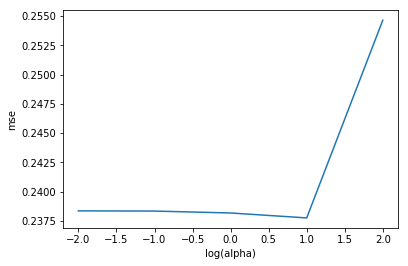

alpha is: 10.0


,coef_lr,coef_ridge,columns
5,[0.319449057556],[0.322947055315],RM
8,[0.229843609595],[0.16743142495],RAD
1,[0.11164947562],[0.0958485565994],ZN
11,[0.0512456938248],[0.0502616633623],B
3,[0.0265359794548],[0.0288216344474],CHAS
2,[-0.0379094943747],[-0.0560070744824],INDUS
6,[-0.0552504538354],[-0.0558579461893],AGE
0,[-0.0829425704712],[-0.0738229893482],CRIM
4,[-0.159177260109],[-0.134971864727],NOX
10,[-0.215616780333],[-0.208999235448],PTRATIO


In [26]:
mse_mean = np.mean(ridge.cv_values_, axis=0)
plt.plot(np.log10(alphas), mse_mean.reshape(len(alphas),1))

plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()

print('alpha is:', ridge.alpha_)
fs = pd.DataFrame({"columns":list(columns), "coef_lr":list(lr.coef_.T), "coef_ridge":list(ridge.coef_.T)})
fs.sort_values(by=['coef_lr'], ascending=False)